<a href="https://colab.research.google.com/github/pionerlike/KP/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%BE%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Импортируем модули и библиотеки

In [97]:
import numpy as np # для работы с массивами
import tensorflow as tf
import matplotlib.pyplot as plt # визуализация рисунков
from tensorflow import keras
%matplotlib inline # визуализация графиков
from tensorflow.keras.datasets import fashion_mnist # набор данных
from tensorflow.keras.models import Sequential # образует последовательность слоев
from tensorflow.keras.layers import Dense, Dropout # полносвязные слои
from tensorflow.keras import utils # различные утилиты, которые помогут перевести данные в подходящий для кераса формат
from google.colab import files
from tensorflow.keras.preprocessing import image
from PIL import Image

#Делим наш датасэт на обучающую и тестовую выборку 

In [98]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [99]:
classes = ['футболка', 'брюки', 'свитер', 'пальто', 'платье', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Предварительная обработка данных

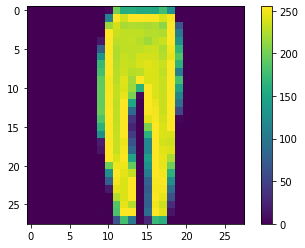

In [100]:
plt.figure()
plt.imshow(x_train[23442]) # от 0 до 59999
plt.colorbar() # если интенсивность картины равно 0, то картина максимально серая
plt.grid(False) # если интенсивность картины равно 255, то картина максимально светлая

#Нормализация данных

In [101]:
x_train = x_train / 255 # улучшение алгоримт оптимизации для этого делим интенсивность каждого
x_test = x_test / 255 #  пикселя изображения на 255, чтобы данные на входе в нейронную сеть находились в диапазоне от 0 до 1

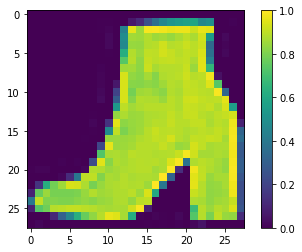

In [102]:
plt.figure()
plt.imshow(x_train[2322])
plt.colorbar()
plt.grid(False)

Посмотрим несколько изображений

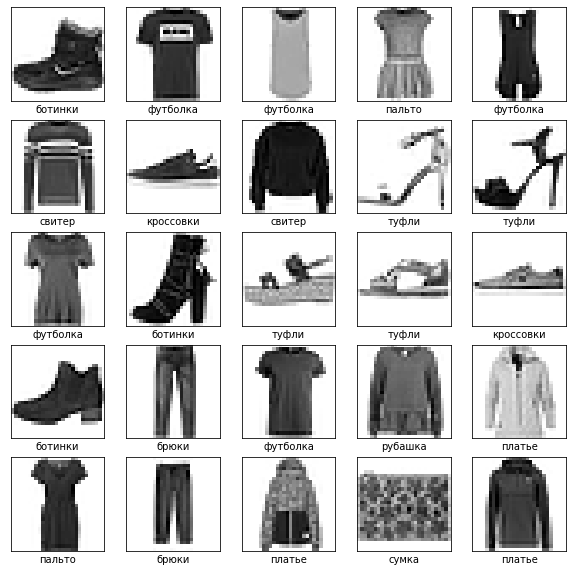

In [103]:
plt.figure(figsize=(10, 10))
for i in range (25): # первые 25 рисунков, по 5 в каждой строке
  plt.subplot(5,5,i+1) 
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary) # делаем рисунки черно-белые
  plt.xlabel(classes[y_train[i]]) #  и отобразим под ними наименование их классов

#Создание модели нейронной сети

In [104]:
model = keras.Sequential([ # создаем слои - последовательную модель
                          keras.layers.Flatten(input_shape=(28,28)), # 1 слой переобразует формат рисунка из двухмерного массива в одномерный массив - размером 784 пикселя
                          keras.layers.Dense(128, activation="relu"), # 2 слой Входной полносвязный слой, 128 нейронов, 784 входа в каждый нейрон 
                          keras.layers.Dense(10, activation="softmax") # 3 слой Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
])

#Компиляция модели

In [105]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# указываем параметры обучения. Оптимизатор SGD - стахостическая градиентный спуск
# функция ошибки указан параметром loss, будем использовать категориально перекрестную интрапию, 
# данная функция ошибки хорошо работает в задачах классификации, когда классов больше двух
# последний параметр - параметр качества accuracy

Напечатаем параметры

In [106]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Обучение модели

In [107]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7446 - accuracy: 0.7626
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5167 - accuracy: 0.8252
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4723 - accuracy: 0.8375
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4479 - accuracy: 0.8444
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4291 - accuracy: 0.8526
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4154 - accuracy: 0.8569
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4033 - accuracy: 0.8611
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3938 - accuracy: 0.8631
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3839 - accuracy: 0.8668
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.376

Проверка точности предсказания

In [108]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8552
Test accuracy: 0.8551999926567078


Попредсказываем

In [131]:
prediction = model.predict(x_train) # используем метод предикт

In [149]:
prediction[23451]

array([6.02155887e-06, 2.92376217e-06, 3.32941590e-06, 2.45821720e-05,
       7.84965505e-06, 9.98319209e-01, 1.12579855e-05, 5.78325475e-04,
       7.22813187e-04, 3.23580636e-04], dtype=float32)

In [ ]:
# у каждого числа в конце -8 -7 -9 - они в минус какой то степени
# и только один -1 степени это примерно 0.99, то есть соответствует классу 9

In [150]:
np.argmax(prediction[23451]) # находим максимальное значение

5

In [151]:
y_train[23451] # выведем правильный ответ из наших меток

5

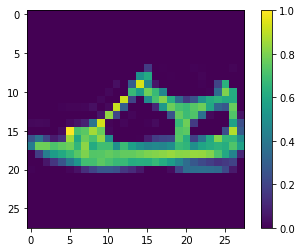

In [152]:
plt.figure()
plt.imshow(x_train[23451])
plt.colorbar()
plt.grid(False)

In [153]:
classes[np.argmax(prediction[23451])] # чтобы каждый раз не смотреть через картину

'туфли'

#Загружаем свою картинку

In [123]:
files.upload()

Saving брюки.jpg to брюки (2).jpg


{'брюки.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00<CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 100\n\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xdb\x00C\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xc0\x00\x11\x08\x03\x98\x03\x98\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00

Проверяем загрузку картинки

In [124]:
!ls

 sample_data	 'брюки (2).jpg'   платье.jpg	      рубашка.jpg   свитер.jpg
'брюки (1).jpg'   брюки.jpg	  'рубашка (1).jpg'   свитер1.jpg


Загружаем картинку из файла

In [125]:
img_path = 'брюки.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показываем картинку

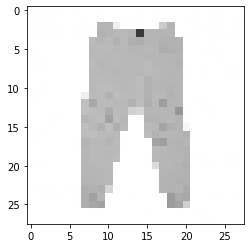

In [126]:
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [127]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [128]:
prediction = model.predict(x_train)

Результаты распознавания

In [129]:
prediction

array([[3.56529064e-08, 1.60366398e-09, 1.43175782e-09, ...,
        7.34781264e-04, 5.17003646e-05, 9.99063790e-01],
       [9.79745328e-01, 5.01981219e-07, 1.02777522e-04, ...,
        9.06339795e-11, 1.94839845e-06, 7.91554544e-10],
       [4.03180867e-01, 7.36727342e-02, 4.33885194e-02, ...,
        1.38853793e-03, 3.58530460e-03, 1.43229845e-04],
       ...,
       [3.11215612e-04, 6.13361306e-04, 2.68784526e-04, ...,
        4.15062331e-08, 1.08416689e-05, 4.13226386e-09],
       [6.49102092e-01, 1.03524262e-02, 1.24716677e-01, ...,
        1.05097635e-04, 1.07879648e-02, 5.13061495e-05],
       [6.69839865e-05, 5.44365139e-05, 2.15046748e-04, ...,
        1.22307707e-03, 1.56531169e-03, 2.49476172e-04]], dtype=float32)

In [130]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 9
Название класса: ботинки
